# Paper: Playing Atari with Deep Reinforcement Learning

### Main Focus

The first deep learning model to successfully learn control policies directly from high-dimensional sensory inputs using reinforcment learning.
- Trained on Q-learning concept
- Input : Raw pixels from Atari 2600 game images
- Output : A value function estimating future rewards

Goal : Creating a neural network agent that is able to successfully learn to play as many Atari games as possible 


### Problems identified

- Problems of using batch update in the earlier neural-fitted Q-learning approach (NFQ) instead of stochastic gradient update 
- Extending the concept of learnig a control policy using linear control to non-linear control (Non-linear function approximators like Neural networks)
- NFQ was not an end to end RL algorithm , it used deep autoencoders for processing visual inputs and then applied NFQ for representation. The work presents a end-to-end RL approch.

### Key Insights 

- Introduces the technqiue of *experience replay* which is storing agents experiences at each tiem step $e_t$ = $(s_t, a_t, r_t, s_{t+1})$ into what we call a replay memory. key point to not here experiences are drawn at random.
- After the above step the agent selects and executes an action accroding to the $\epsilon$-greedy policy
-Below image provides a pseudo-code for the algorithm (Deep Q-learning)


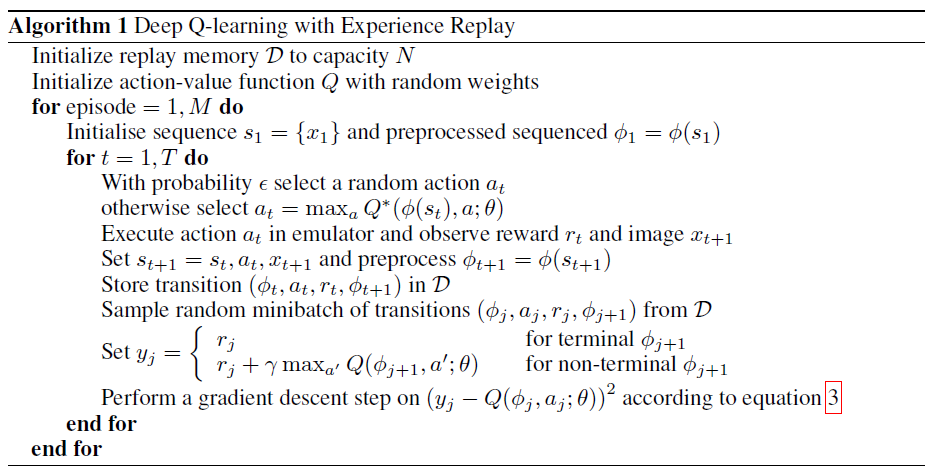

In [1]:
from IPython.display import Image
Image(filename='DQN.png')

Here, $\mathcal{D}$ is the replay buffer, $\mathcal{Q}$ is the optimum action value function , $\lambda$ is the discount factor and the sequence of loss functions over $\mathcal{i}$ which is minimized is given by
\begin{equation}
    L_i( \theta_{i}) = \mathbb{E}_{s,a,r,s' \sim \mathcal{D}} \big[( \mathit{y}- Q(s,a|\theta_{i}))^2]
\end{equation}
where $\mathit{y} = r + \gamma \max Q(s',a'| \theta^-)$, $\mathcal{D}$ is the replay buffer, $Q(s,a|\theta_{i})$ 

### Key Advantages of the approach
- Each step of experience is potentially used in many weight updates , which allows for greater data efficiency 
- Learning from consecutive samples is inefficient because of high correlation; randomzing the samples breaks these correlations and reduces variance 
- Alleviate the problem of unwnated feedback loops and parameters getting struck in local minimum;using experience replay the behaviour is averaged out over many previous states. 

### Architecture details 


- Preprocessed raw frames for reducing input dimensionality 
$210 \times 160$ RGB representation $\rightarrow$ gray-scale $\rightarrow$ downsample to $110 \times 84$  $\rightarrow$ crop a $84 \times 84$ capturing playing area $\rightarrow$ input
   
- Separate output unit for each possible action corresponding to predicted q-values for individual actions ; Input is the state representation

- Input to NN:  $84 \times 84 \times 4$ images $\rightarrow$ 
- first hidden layer : 16 , 8x8 filters with stride 4 with input image using ReLu
- second hidden layer :32 , 4x4 filters , strides of 2 using ReLu
- Followed by a FC with 256 ReLu as the final hidden layer
- Output layer of NN : FC linear layer with single output for each action
    

### Results
- Left two plots show the average total reward during training 
- Since the above plots are nosiy a better metric would be to policy's estimated action-value function Q,  which provides an estimate about how much discounted reward the agent can obtain by following its policy from a given state



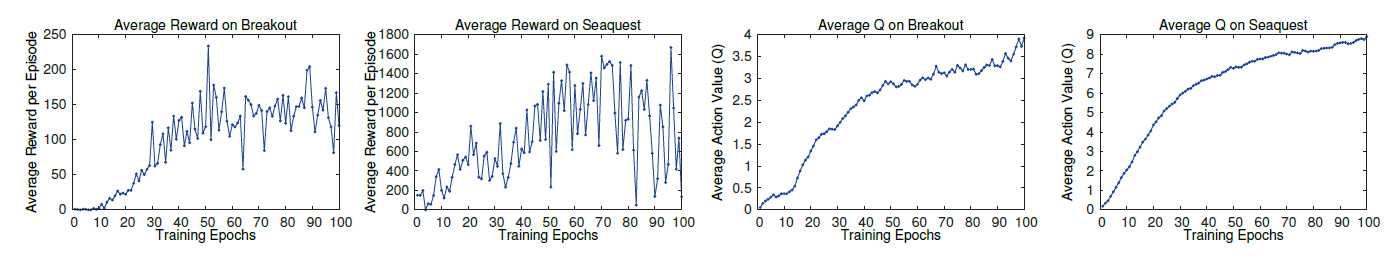

In [3]:
from IPython.display import Image
Image(filename='DQN1.png')

The below viz is the viz for the learned value function The figure shows
that the predicted value jumps after an enemy appears on the left of the screen (point A). The agent
then fires a torpedo at the enemy and the predicted value peaks as the torpedo is about to hit the
enemy (point B). Finally, the value falls to roughly its original value after the enemy disappears
(point C). It demonstrates that our method is able to learn how the value function evolves for
a reasonably complex sequence of events.

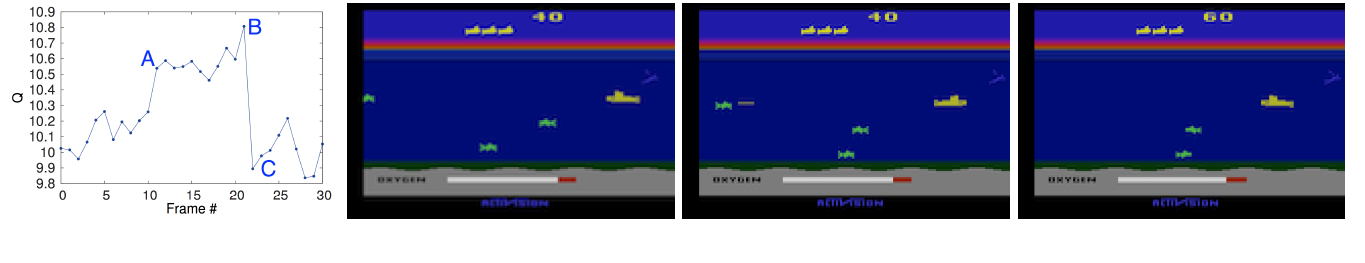

In [1]:
from IPython.display import Image
Image(filename='DQN3.png')